In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [3]:
#part2-fitting the cnn to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

In [4]:
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('F:/School/dog_cat_data/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('F:/School/dog_cat_data/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 subset='validation')
# print(training_set.shape)
# training_val = training_set[8000:9000,:]
# training_train = training_set[:8000]
# Creating the Test set
test_set = test_datagen.flow_from_directory('F:/School/dog_cat_data/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')
# test_val = test_set[2000:3000,:]
# test_train = test_set[:2000]

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
#initializing the cnn
classifier=Sequential()
#step1-convolution
classifier.add(Conv2D(8,(3,3), activation='relu', input_shape=(64,64,3)))
#step2-maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))


classifier.add(Conv2D(16,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#step3-flattening
classifier.add(Flatten())

#step4-fullconnection
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

In [6]:
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
print(training_set)
training_set.class_indices
training_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
H = classifier.fit(training_set, epochs=10, validation_data=validation_set)

Epoch 1/10
401/401 [==============================] - 107s 267ms/step - loss: 0.6696 - accuracy: 0.5879 - val_loss: 0.6492 - val_accuracy: 0.6127
Epoch 2/10
401/401 [==============================] - 26s 65ms/step - loss: 0.6217 - accuracy: 0.6608 - val_loss: 0.5722 - val_accuracy: 0.7033
Epoch 3/10
401/401 [==============================] - 26s 66ms/step - loss: 0.5759 - accuracy: 0.6946 - val_loss: 0.5599 - val_accuracy: 0.7108
Epoch 4/10
401/401 [==============================] - 26s 66ms/step - loss: 0.5461 - accuracy: 0.7189 - val_loss: 0.5448 - val_accuracy: 0.7220
Epoch 5/10
401/401 [==============================] - 26s 65ms/step - loss: 0.5337 - accuracy: 0.7331 - val_loss: 0.5237 - val_accuracy: 0.7370
Epoch 6/10
401/401 [==============================] - 26s 66ms/step - loss: 0.5161 - accuracy: 0.7411 - val_loss: 0.5034 - val_accuracy: 0.7508
Epoch 7/10
401/401 [==============================] - 26s 66ms/step - loss: 0.4957 - accuracy: 0.7544 - val_loss: 0.5023 - val_accurac

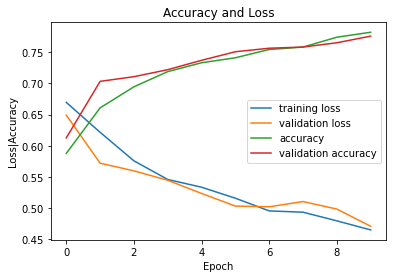

In [10]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [11]:
score = classifier.evaluate(test_set, batch_size=16)
print(score)

127/127 [==============================] - 23s 181ms/step - loss: 0.4945 - accuracy: 0.7583
[0.4944554269313812, 0.7582798004150391]


In [16]:
from tensorflow.keras.preprocessing import image
#to predict new images 
def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size = (64, 64))   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)

In [17]:
imagepath = 'F:/School/dog_cat_data/training_set/training_set/cats/cat.63.jpg'
predict_image('F:/School/dog_cat_data/training_set/training_set/cats/cat.63.jpg', classifier)

probability = 0.727742612361908
Prediction = cat
